# Importing the Required Directories

In [3]:
#Importing Libraries for Analysis
import numpy as np
import pandas as pd

#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Importing Libraries for Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

#Importing Libraries for Model Selection
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV

# Importing the Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# About Dataset
**Context**
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Content**
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Importing the Required Directories

In [4]:
#Accessing the Dataset
df = pd.read_csv('water_potability.csv')

In [5]:
#Look of the Dataset
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
#Shape of the Dataset
df.shape

(3276, 10)

**Observation:**
* The Following Dataset contains 3276 rows and 10 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
#Statistical Analysis
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [57]:
#Checking the Null values of each column
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Observation**
* Three columns are there that have Null values.
* The column names are ph,Sulfate and Trihalomethanes

# Exploratory Data Analysis

In [11]:
#Analyzing the Potability column
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [58]:
#Visualizing the Potability column
fig = px.pie(df,values = df['Potability'].value_counts(),
          names=[0,1],
          title='<b>Potability Percentage',
          hole=0.2,
          color_discrete_sequence=px.colors.qualitative.Pastel,
          template='plotly_dark')
fig.update_layout(title_font_size=30)
fig.show()

**Potablity:** If Water safe for Drinking
* Potable---> 1(Water safe for Drinking)
* Not Potable--->0(Water not safe for Drinking)

**Observation**
* 61% of Water is not safe for Drinking and 39% is safe for Drinking

In [13]:
#Analyzing the ph feature

fig = px.histogram( df, x ="ph", nbins=40, color_discrete_sequence = ["#ffff00"], title = "<b>PH Distribution", text_auto=True)
fig.update_layout(template="plotly_dark" )

fig.show()

**Observation**
* The PH is Normally Distributed.

In [14]:
#Checking the Outliers in ph feature using 3-Standard Deviation method
upper = df['ph'].mean() + 3 * df['ph'].std()
lower = df['ph'].mean() - 3 * df['ph'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper,lower))

Upper Limit is 11.863753060379953 and Lower Limit is 2.297835948146404


**Observation:**
* The Upper Limit of ph distribution is 11.86
* The Lower Limit of ph distribution is 2.29

**Insight:**
* This will help me to remove the Outliers.

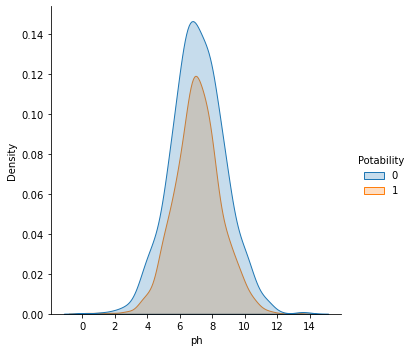

In [27]:
# Bivariate Analysis of ph with Potability

sns.displot(x = df['ph'], hue = df['Potability'], kind ='kde',fill=True)

**Observation:**
* The Distribution of ph related to Potability is almost same.
* The Not Potable Water has more Ph level than of Potable Water.

In [28]:
# Analyzing the Hardness of the Water
fig = px.histogram( df, x="Hardness", nbins = 40, color_discrete_sequence=["#80ffff"],title="<b>Hardness Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

**Observation:**
* The Hardness is Normally Distributed.

In [30]:
#Checking the Outliers in Hardness feature using 3-Standard Deviation method
upper_har = df['Hardness'].mean() + 3 * df['Hardness'].std()
lower_har = df['Hardness'].mean() - 3 * df['Hardness'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_har,lower_har))

Upper Limit is 295.0087804468584 and Lower Limit is 97.73021158838574


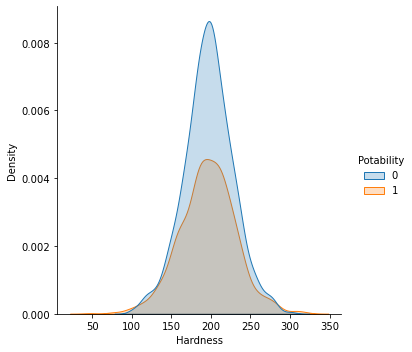

In [31]:
# Bivariate Analysis of Hardness with Potability

sns.displot(x = df['Hardness'],hue = df['Potability'],kind='kde',fill=True)

**Observation:**
* The Not Potable Water has more Hardness as compared to Potable Water.

In [32]:
fig = px.histogram( df,x = "Solids",nbins = 50,color_discrete_sequence=["#9999ff"],title="<b>Solids Distribution",text_auto=True)
fig.update_layout(template ='plotly_dark')
fig.show()

In [33]:
#Checking the Outliers in Solids feature using 3-Standard Deviation method
upper_sol = df['Solids'].mean() + 3 * df['Solids'].std()
lower_sol = df['Solids'].mean() - 3 * df['Solids'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_sol,lower_sol))

Upper Limit is 48319.80500955815 and Lower Limit is -4291.619957300012


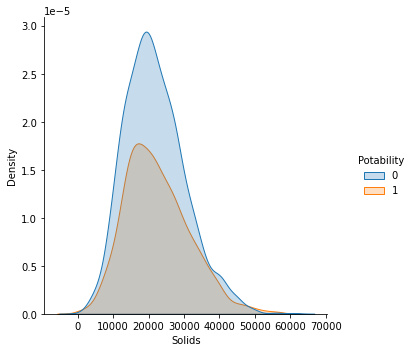

In [34]:
sns.displot( x = df['Solids'],hue = df['Potability'],kind='kde',fill=True)

In [37]:
# Analyzing the Chloramines of the Water
fig = px.histogram( df,x = "Chloramines",nbins = 40,color_discrete_sequence=["#99ff99"],title="<b>Chloramines Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [66]:
#Checking the Outliers in Chloramines feature using 3-Standard Deviation method
upper_chl=df['Chloramines'].mean() + 3*df['Chloramines'].std()
lower_chl=df['Chloramines'].mean() - 3*df['Chloramines'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_chl,lower_chl))

Upper Limit is 11.871531460609436 and Lower Limit is 2.373022126245882


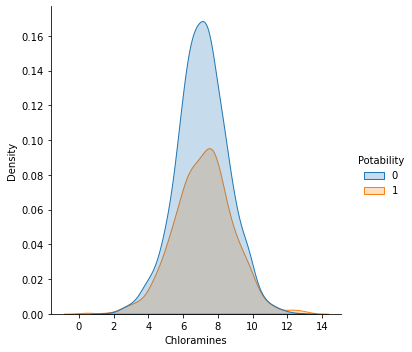

In [38]:
sns.displot(x = df['Chloramines'],hue = df['Potability'],kind = 'kde',fill=True)

In [39]:
# Analyzing the Sulfate of the Water
fig=px.histogram( df,x="Sulfate",nbins=40,color_discrete_sequence=["#ffd9b3"],title="<b>Sulfate Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [40]:
#Checking the Outliers in Sulfate feature using 3-Standard Deviation method
upper_sul = df['Sulfate'].mean() + 3 * df['Sulfate'].std()
lower_sul = df['Sulfate'].mean() - 3 * df['Sulfate'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_sul,lower_sul))

Upper Limit is 458.0262979954834 and Lower Limit is 209.52525522552008


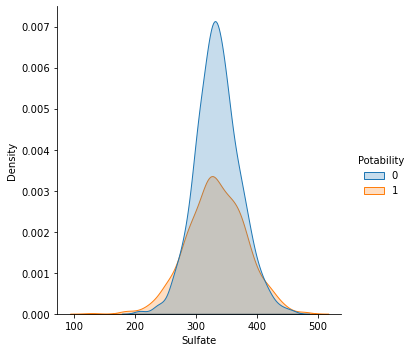

In [41]:
sns.displot(x = df['Sulfate'],hue = df['Potability'],kind='kde',fill=True)

In [42]:
# Analyzing the Conductivity of the Water
fig=px.histogram( df,x="Conductivity",nbins=40,color_discrete_sequence=["#f0b3ff"],title="<b>Conductivity Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [43]:
#Checking the Outliers in Conductivity feature using 3-Standard Deviation method
upper_cond= df['Conductivity'].mean() + 3* df['Conductivity'].std()
lower_cond= df['Conductivity'].mean() - 3* df['Conductivity'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_cond,lower_cond))

Upper Limit is 668.6773028365741 and Lower Limit is 183.73291852807893


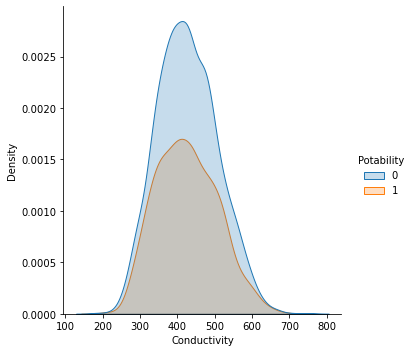

In [44]:
sns.displot(x = df['Conductivity'],hue = df['Potability'],kind='kde',fill=True)

In [45]:
# Analyzing the Organic_carbon of the Water
fig=px.histogram( df, x="Organic_carbon",nbins=40,color_discrete_sequence=["#ff99c2"],title="<b>Organic_carbon Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [46]:
#Checking the Outliers in Organic_carbon feature using 3-Standard Deviation method
upper_car = df['Organic_carbon'].mean() + 3* df['Organic_carbon'].std()
lower_car = df['Organic_carbon'].mean() - 3* df['Organic_carbon'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_car,lower_car))

Upper Limit is 24.209456244742874 and Lower Limit is 4.360484250609376


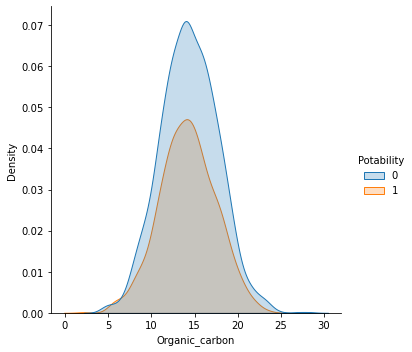

In [47]:
sns.displot(x = df['Organic_carbon'],hue = df['Potability'],kind='kde',fill=True)

In [48]:

# Analyzing the Trihalomethanes of the Water
fig=px.histogram( df,x="Trihalomethanes",nbins=40,color_discrete_sequence=["#00b3b3"],title="<b>Trihalomethanes Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [49]:
#Checking the Outliers in Trihalomethanes feature using 3-Standard Deviation method
upper_tri= df["Trihalomethanes"].mean() + 3* df["Trihalomethanes"].std()
lower_tri= df["Trihalomethanes"].mean() - 3* df["Trihalomethanes"].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_tri,lower_tri))

Upper Limit is 114.92131821297971 and Lower Limit is 17.871267680338804


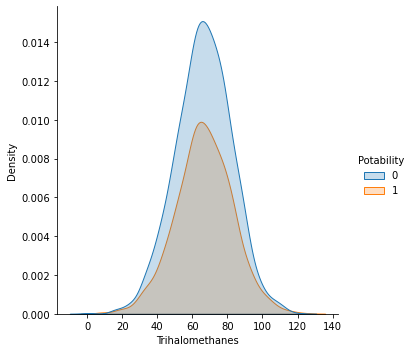

In [50]:
sns.displot(x = df['Trihalomethanes'],hue = df['Potability'],kind='kde',fill=True)

In [51]:

# Analyzing the Turbidity of the Water
fig=px.histogram(df,x="Turbidity",nbins=40,color_discrete_sequence=["#ffb366"],title="<b>Turbidity Distribution",text_auto=True)
fig.update_layout(template='plotly_dark')
fig.show()

In [52]:
#Checking the Outliers in Turbidity feature using 3-Standard Deviation method
upper_tur= df['Turbidity'].mean() + 3* df['Turbidity'].std()
lower_tur= df['Turbidity'].mean() - 3* df['Turbidity'].std()
print('Upper Limit is {} and Lower Limit is {}'.format(upper_tur,lower_tur))

Upper Limit is 6.307933395221888 and Lower Limit is 1.6256389443721355


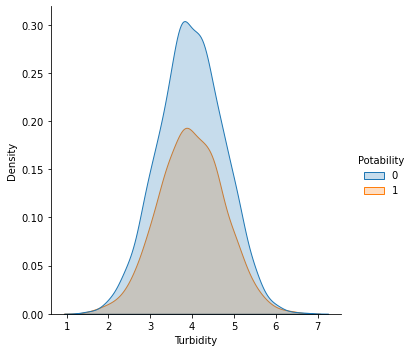

In [53]:
sns.displot(x = df['Turbidity'],hue = df['Potability'],kind='kde',fill=True)

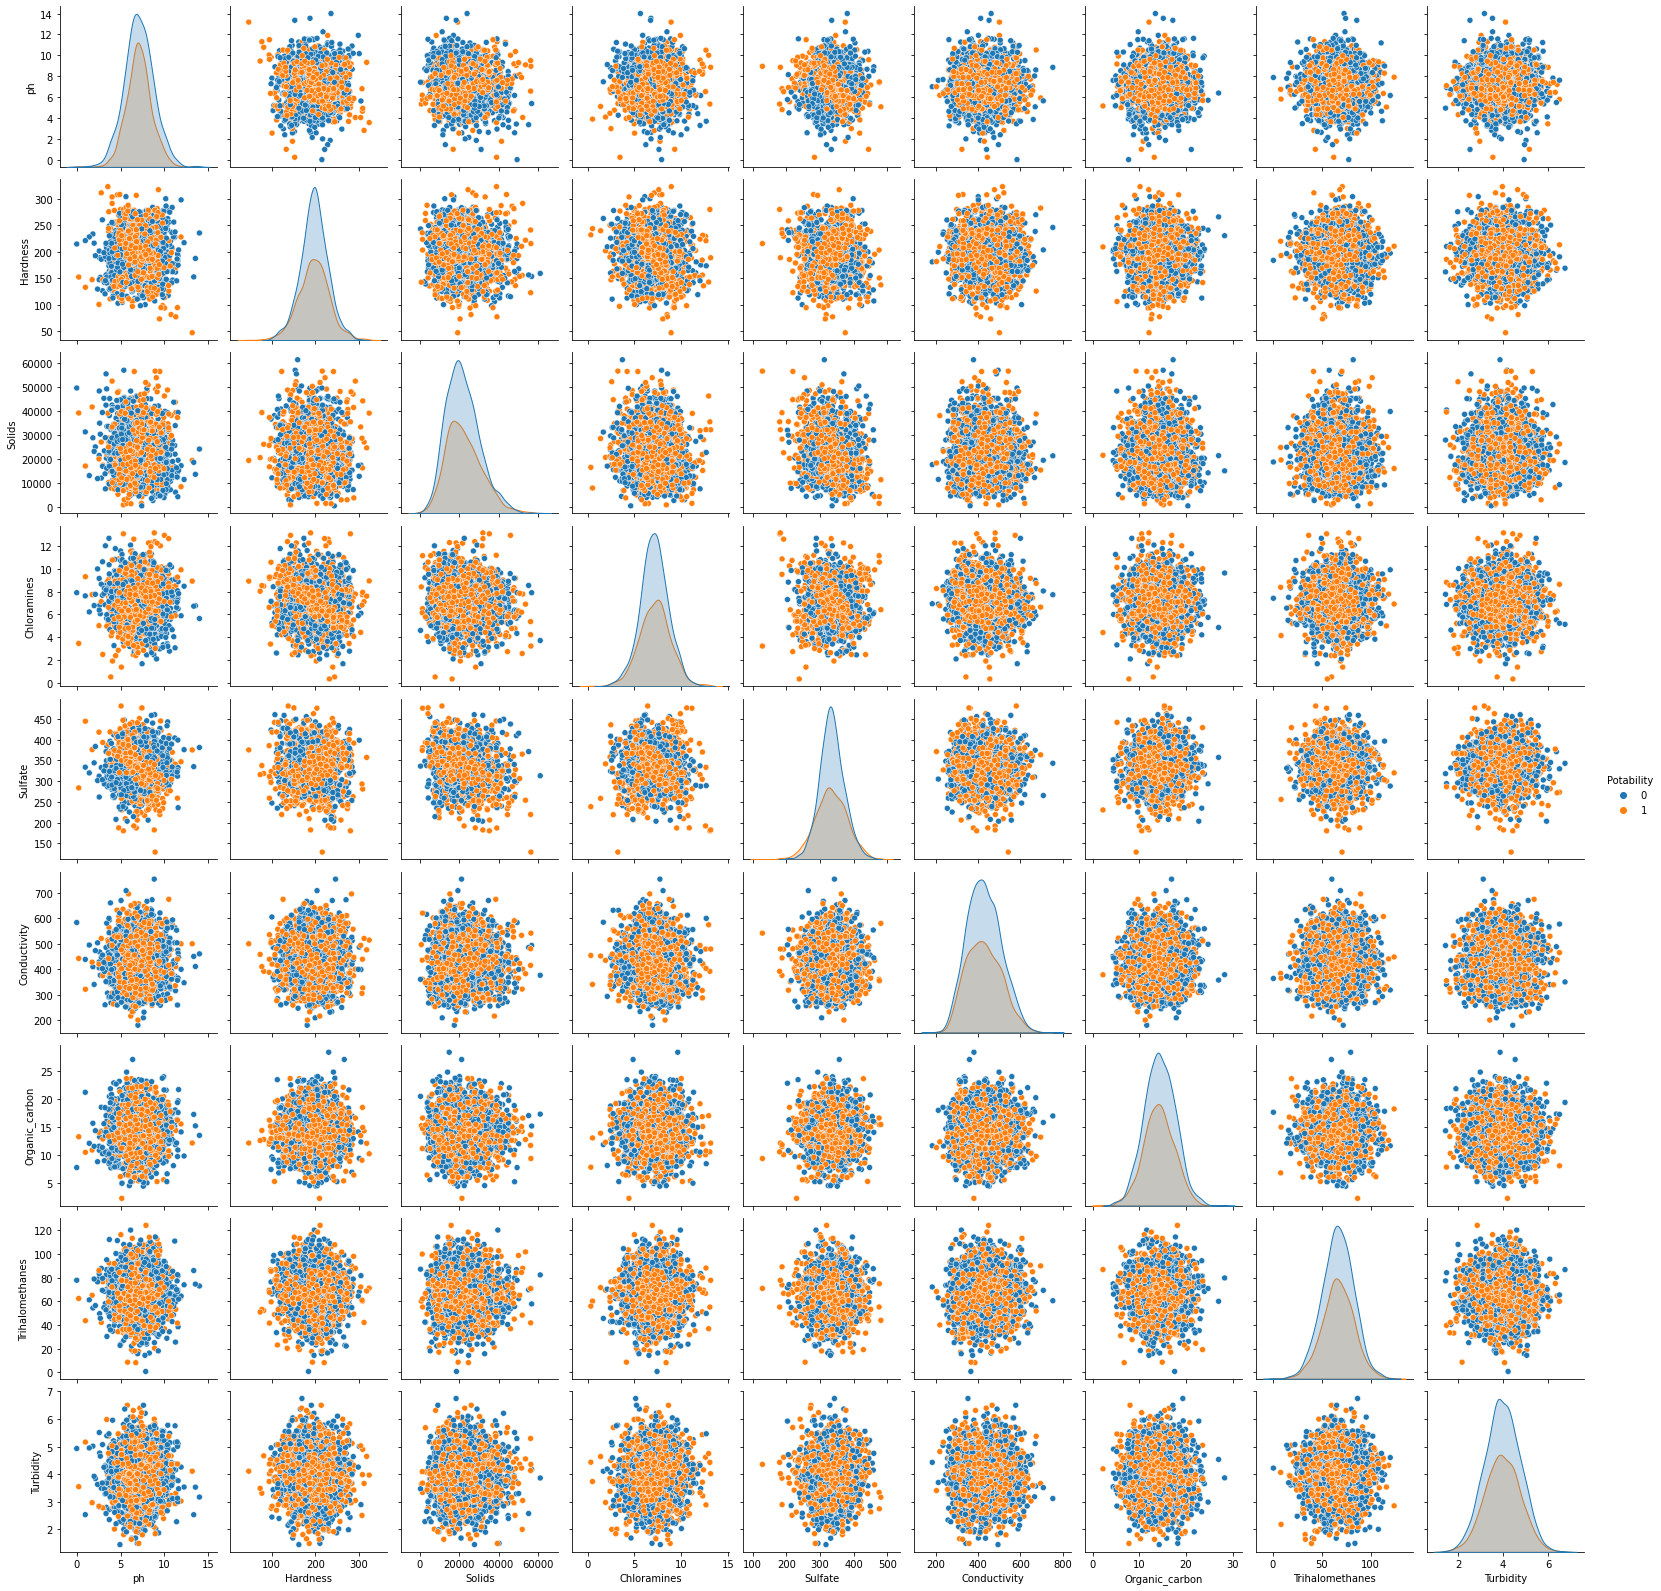

In [38]:
sns.pairplot( df,hue='Potability')

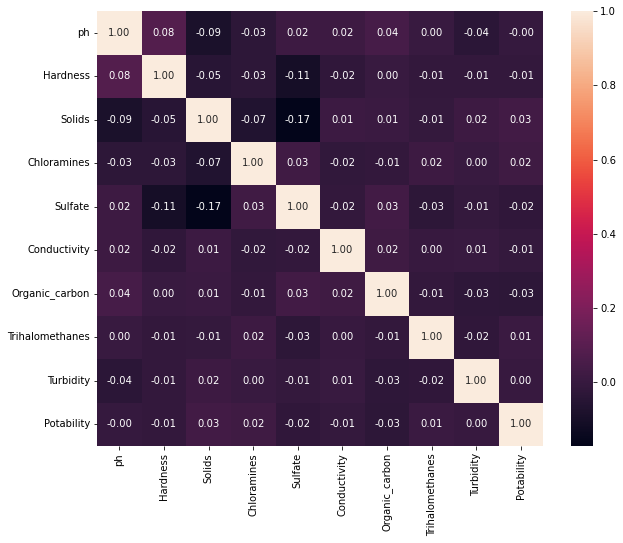

In [59]:
#Visualizing the Correlation Matrix of Features
plt.figure(figsize=(10,8))
sns.heatmap( df.corr(), annot=True, fmt='.2f')
plt.show()

**Observations:**
* All Features are Normally Distributed.
* Every Feature contains Few Outliers.
* Every Feature is not highly correlated with Potability Feature.

**Insights:**
* Remove all Outliers in order to improve the Accuracy of the Model.

# Feature Engineering

**Filling Missing Values**

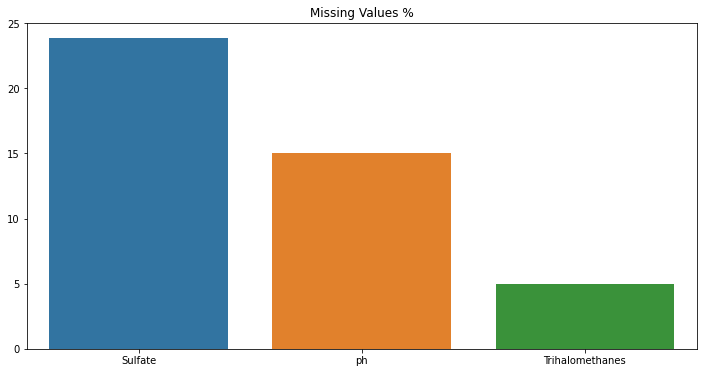

In [67]:
#Checking the Percentage of Missing Values
plt.figure(figsize=(12,6))
missing_values=round( df.isna().sum()*100/len(df),2)
missing_values=missing_values[missing_values > 0]
missing_values.sort_values(inplace=True,ascending=False)
sns.barplot(x = missing_values.index,y = missing_values.values)
plt.title('Missing Values %')
plt.show()

In [72]:
#Filling the Missing Values with their Mean because Features are Normally Distributed.
#Sulfate_Mean
sulfate_mean = df[(df['Sulfate']>=lower_sul) &(df['Sulfate']<=upper_sul)]['Sulfate'].mean()
df['Sulfate'].fillna(sulfate_mean,inplace=True)
#ph Mean
ph_mean = df[(df['ph']>=lower) &(df['ph']<=upper)]['ph'].mean()
df['ph'].fillna(ph_mean,inplace=True)
#Trihalomethanes Mean
tri_mean = df[(df['Trihalomethanes']>=lower_tri) &(df['Trihalomethanes']<=upper_tri)]['Trihalomethanes'].mean()
df['Trihalomethanes'].fillna(tri_mean,inplace=True)

In [42]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Data Cleaning

In [74]:
#Removing the Outliers

df= df[(df['ph'] >= lower) & ( df['ph'] <= upper)&
                  (df['Hardness']>=lower_har)& (df['Hardness']<=upper_har)&
                  (df['Solids']>=lower_sol)& (df['Solids']<=upper_sol)&
                  (df['Chloramines']>=lower_chl)& (df['Chloramines']<=upper_chl)&
                  (df['Sulfate']>=lower_sul)& (df['Sulfate']<=upper_sul)&
                  (df['Conductivity']>=lower_cond)& (df['Conductivity']<=upper_cond)&
                  (df['Organic_carbon']>=lower_car)& (df['Organic_carbon']<=upper_car) &
                  (df['Trihalomethanes']>=lower_tri)& (df['Trihalomethanes']<=upper_tri)&
                  (df['Turbidity']>=lower_tur)& (df['Turbidity']<=upper_tur)]

In [76]:
df.shape

(1936, 10)

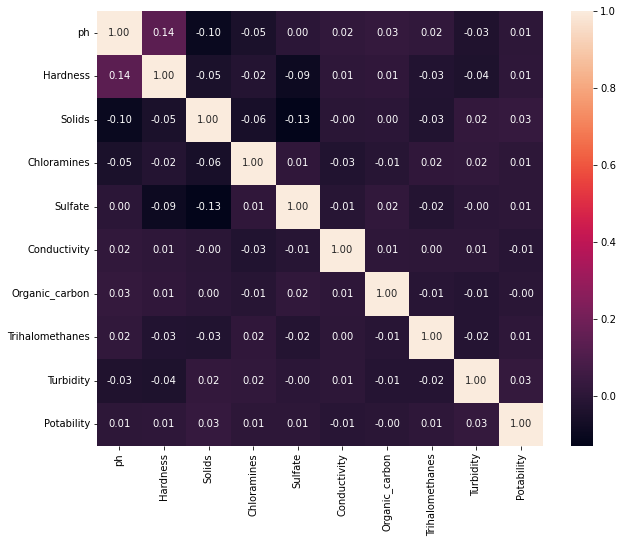

In [77]:
#Visualizing the Correlation Matrix of Features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()


# Splitting of Train and Test Data

In [154]:
X= df.drop('Potability',axis=1)
y= df['Potability']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle = True)

In [155]:
X_train.head()

ph    Hardness       Solids  Chloramines     Sulfate  \
1459  6.867001  184.248496  14464.11555     6.759352  371.283819   
2833  8.149437  220.203734  23978.10768     7.384126  360.414005   
2764  6.272475  190.200713  14642.20554     9.734513  399.052941   
1263  6.115180  226.084429  24699.52390     6.707523  298.329339   
1008  8.693104  184.772809  13283.77805     6.521815  348.554792   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
1459    497.703775       14.782861        73.433479   3.484121  
2833    461.804548       13.364677       103.380210   4.949257  
2764    448.568260       16.557177        74.435389   4.612536  
1263    429.706681       14.536080        71.045480   3.690862  
1008    560.965910       13.978348        71.733845   2.898223

In [80]:
X_test.head()

ph    Hardness       Solids  Chloramines     Sulfate  \
979   8.163076  183.161853  20335.67651     6.028559  333.084455   
1528  6.788292  182.036895  25661.36054     6.939853  352.344929   
1538  7.256015  196.649823  44184.23046     5.265558  260.425605   
2968  4.663492  170.951830  41452.62557     8.725765  362.415419   
2476  5.045626  179.702503  22557.60360    10.120334  296.425154   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
979     475.296471       18.248098        49.604842   3.287244  
1528    419.895889       11.835382        71.436038   4.255948  
1538    324.250148        8.148929        69.375044   4.534960  
2968    378.149000       16.274051        60.618754   3.742293  
2476    450.295696       14.215817        82.066334   3.331787

In [81]:
y_train.head()

1459    0
2833    1
2764    1
1263    0
1008    0
Name: Potability, dtype: int64

In [82]:
#Shape of the X_train and X_test
print(X_train.shape,X_test.shape)

(1548, 9) (388, 9)


# Standardization

In [156]:
#Standardizing the Dataset in order to get more accuracy
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# Modelling

In [157]:
models={
    'Logistic Regression':LogisticRegression(),
    'Decision Trees':DecisionTreeClassifier(),
    'SVM Classifier':SVC(),
}

In [158]:
#Training Different Models
for name,model in models.items():
    model.fit(X_train,y_train)
    print(f'{name} trained')

Logistic Regression trained
Decision Trees trained
SVM Classifier trained


# Evaluating the Models

In [159]:
#Logistic Regression 
model = LogisticRegression()

64.17525773195877


<AxesSubplot:>

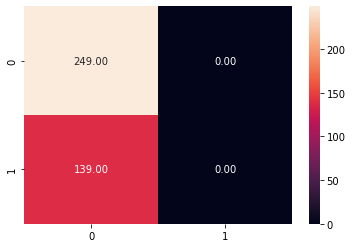

In [160]:
model.fit(X_train ,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

In [161]:
# Decision Tree
model2 = DecisionTreeClassifier()

In [162]:
model2.fit(X_train ,y_train)
y_pred = model2.predict(X_test)

59.02061855670103


<AxesSubplot:>

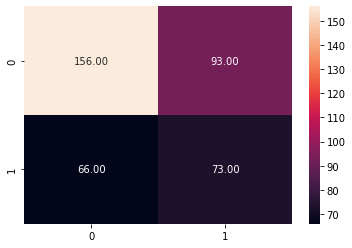

In [163]:
print(accuracy_score(y_test,y_pred)*100)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

In [164]:
# SVC classifier
model3 = SVC()

In [165]:
model3.fit(X_train ,y_train)
y_pred = model3.predict(X_test)

71.64948453608247


<AxesSubplot:>

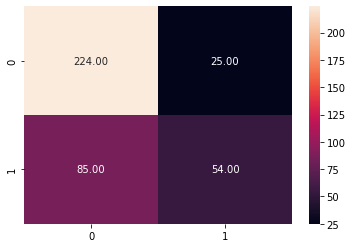

In [166]:
print(accuracy_score(y_test,y_pred)*100)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

# Conclusion
* The Support Vector Classifier is giving us the accuracy of 70%.
* The Accuracy is low because the Features are not highly correlated with the Target.
* The Accuracy can be increased by Hyperparameter Tuning.